In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
A = np.eye(5)
A

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [124]:
np.eye(3, k=2)


array([[0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [125]:
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

1 简单练习
输出一个5*5的单位矩阵

2 单变量的线性回归
整个2的部分需要根据城市人口数量，预测开小吃店的利润
数据在ex1data1.txt里，第一列是城市人口数量，第二列是该城市小吃店利润。
2.1 Plotting the Data
读入数据，然后展示数据

In [142]:
path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()


,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


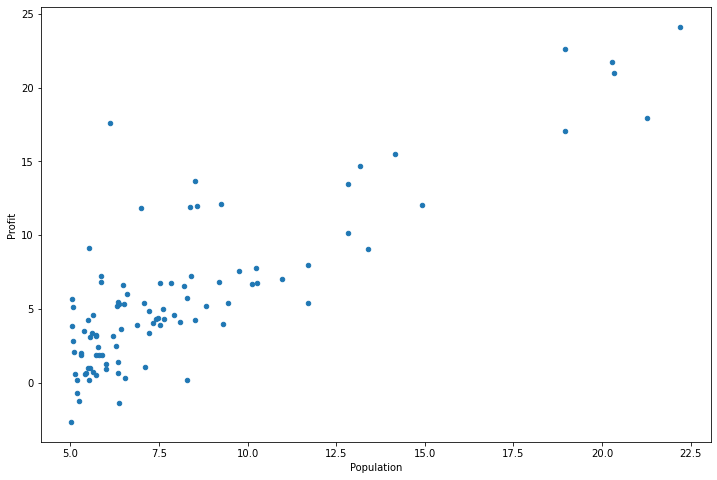

In [127]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

In [128]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [154]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)

    return np.sum(inner) / (2 * len(X))
    # return np.sum(np.dot(diff.transpose(),diff)) / (2 * len(X))

In [144]:
data.insert(0,'ones',1)
data.head()

,ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [145]:
cols = data.shape[1]
X = data.iloc[:,:-1]#X是data里的除最后列
y = data.iloc[:,cols-1:cols]#y是data最后一列
X.head()

,ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [132]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [133]:
type(X)

pandas.core.frame.DataFrame

In [146]:
# matrix out of time ,all using ndarry
X = X.values
y = y.values
theta = np.matrix(np.array([0,0]))
# theta=np.zeros((2, 1))

In [153]:
X.shape,y.shape,theta.shape

((97, 2), (97, 1), (1, 2))

In [155]:
computeCost(X, y, theta)

32.072733877455676

In [156]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost



In [159]:
alpha = 0.01
iters = 1500
X, y, theta, alpha, iters,np.matrix(np.zeros(theta.shape)),int(theta.ravel().shape[1])

(array([[ 1.    ,  6.1101],
        [ 1.    ,  5.5277],
        [ 1.    ,  8.5186],
        [ 1.    ,  7.0032],
        [ 1.    ,  5.8598],
        [ 1.    ,  8.3829],
        [ 1.    ,  7.4764],
        [ 1.    ,  8.5781],
        [ 1.    ,  6.4862],
        [ 1.    ,  5.0546],
        [ 1.    ,  5.7107],
        [ 1.    , 14.164 ],
        [ 1.    ,  5.734 ],
        [ 1.    ,  8.4084],
        [ 1.    ,  5.6407],
        [ 1.    ,  5.3794],
        [ 1.    ,  6.3654],
        [ 1.    ,  5.1301],
        [ 1.    ,  6.4296],
        [ 1.    ,  7.0708],
        [ 1.    ,  6.1891],
        [ 1.    , 20.27  ],
        [ 1.    ,  5.4901],
        [ 1.    ,  6.3261],
        [ 1.    ,  5.5649],
        [ 1.    , 18.945 ],
        [ 1.    , 12.828 ],
        [ 1.    , 10.957 ],
        [ 1.    , 13.176 ],
        [ 1.    , 22.203 ],
        [ 1.    ,  5.2524],
        [ 1.    ,  6.5894],
        [ 1.    ,  9.2482],
        [ 1.    ,  5.8918],
        [ 1.    ,  8.2111],
        [ 1.    ,  7

In [161]:
(X * theta.T) - y
# g, cost = gradientDescent(X, y, theta, alpha, iters)
# g

matrix([[-17.592  ],
        [ -9.1302 ],
        [-13.662  ],
        [-11.854  ],
        [ -6.8233 ],
        [-11.886  ],
        [ -4.3483 ],
        [-12.     ],
        [ -6.5987 ],
        [ -3.8166 ],
        [ -3.2522 ],
        [-15.505  ],
        [ -3.1551 ],
        [ -7.2258 ],
        [ -0.71618],
        [ -3.5129 ],
        [ -5.3048 ],
        [ -0.56077],
        [ -3.6518 ],
        [ -5.3893 ],
        [ -3.1386 ],
        [-21.767  ],
        [ -4.263  ],
        [ -5.1875 ],
        [ -3.0825 ],
        [-22.638  ],
        [-13.501  ],
        [ -7.0467 ],
        [-14.692  ],
        [-24.147  ],
        [  1.22   ],
        [ -5.9966 ],
        [-12.134  ],
        [ -1.8495 ],
        [ -6.5426 ],
        [ -4.5623 ],
        [ -4.1164 ],
        [ -3.3928 ],
        [-10.117  ],
        [ -5.4974 ],
        [ -0.55657],
        [ -3.9115 ],
        [ -5.3854 ],
        [ -2.4406 ],
        [ -6.7318 ],
        [ -1.0463 ],
        [ -5.1337 ],
        [ -1.

In [162]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [163]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()


,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [164]:
# 加一列常数项
data2.insert(0, 'Ones', 1)

# 初始化X和y
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# 转换成matrix格式，初始化theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# 运行梯度下降算法
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)
g2

matrix([[-9.47882434e-17,  8.84042349e-01, -5.24551809e-02]])

In [165]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T@X)@X.T@y#X.T@X等价于X.T.dot(X)
    return theta


In [166]:
final_theta2=normalEqn(X, y)#这里用的是data1的数据
final_theta2


array([[-3.89578088],
       [ 1.19303364]])